In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns 
import sklearn as skl 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import math 

In [2]:
df = pd.read_csv('data/study_data.csv')

In [3]:
vanilla_df = df

In [4]:
vanilla_df[['fico_start','fico_end']] = df['fico_range'].str.split('-',expand=True).astype(int)

In [5]:
vanilla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
 5   fico_start                  2498 non-null   int32  
 6   fico_end                    2498 non-null   int32  
dtypes: float64(4), int32(2), object(1)
memory usage: 117.2+ KB


In [6]:
vanilla_df = vanilla_df.drop('fico_range',axis=1)

In [7]:
vanilla_df['fico_average'] = (vanilla_df['fico_end'] + vanilla_df['fico_start'])/2

In [8]:
vanilla_df = vanilla_df.drop('fico_start', axis=1)
vanilla_df = vanilla_df.drop('fico_end',axis=1)

In [9]:
vanilla_df

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.00,36.0,737.0
1,12.12,19200.0,19200.00,36.0,717.0
2,21.98,35000.0,35000.00,60.0,692.0
3,9.99,10000.0,9975.00,36.0,697.0
4,11.71,12000.0,12000.00,36.0,697.0
...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,707.0
2494,14.09,16000.0,16000.00,60.0,742.0
2495,13.99,10000.0,10000.00,36.0,682.0
2496,12.42,6000.0,6000.00,36.0,677.0


In [10]:
# vanilla_df['fico_range'] = vanilla_df['fico_range'].apply(lambda x: int(x.split('-')[0] + x.split('-')[1]))

In [11]:
vanilla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   amount_requested            2498 non-null   float64
 2   amount_funded_by_investors  2498 non-null   float64
 3   loan_length                 2498 non-null   float64
 4   fico_average                2498 non-null   float64
dtypes: float64(5)
memory usage: 97.7 KB


In [12]:
vanilla_df

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.00,36.0,737.0
1,12.12,19200.0,19200.00,36.0,717.0
2,21.98,35000.0,35000.00,60.0,692.0
3,9.99,10000.0,9975.00,36.0,697.0
4,11.71,12000.0,12000.00,36.0,697.0
...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,707.0
2494,14.09,16000.0,16000.00,60.0,742.0
2495,13.99,10000.0,10000.00,36.0,682.0
2496,12.42,6000.0,6000.00,36.0,677.0


In [13]:
#vanilla_df = vanilla_df.drop('amount_funded_by_investors',axis=True)

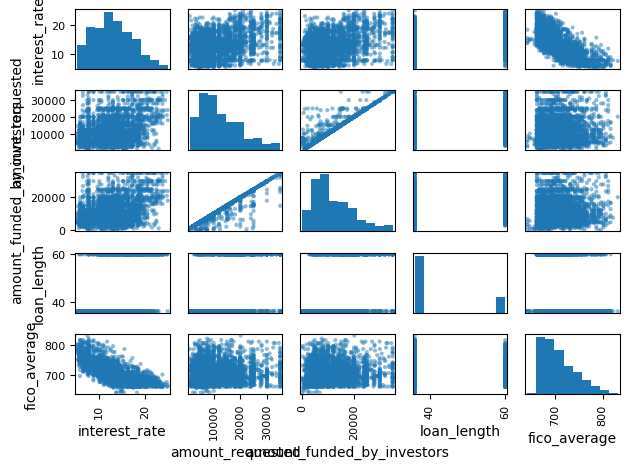

In [46]:
pd.plotting.scatter_matrix(vanilla_df)
plt.tight_layout()


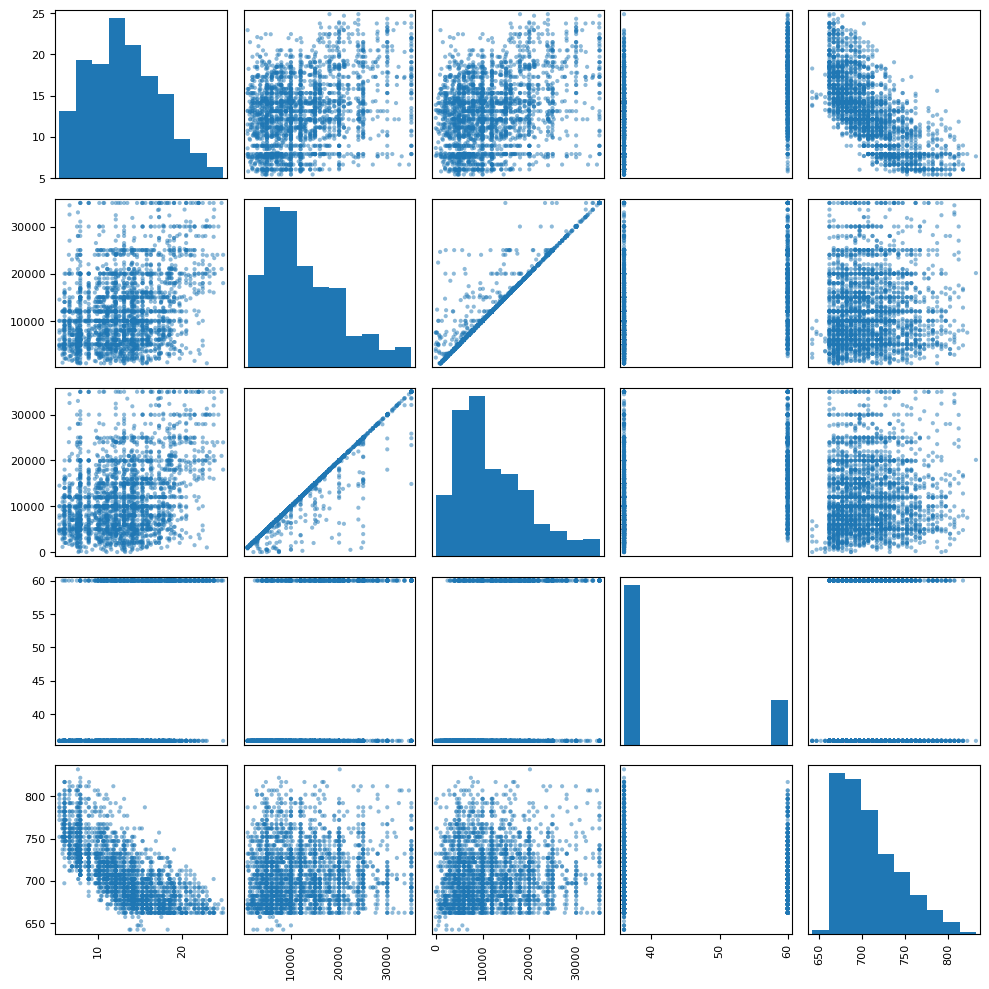

In [50]:
scatter_matrix = pd.plotting.scatter_matrix(vanilla_df, figsize=(10, 10))

# Remove column names
for ax in scatter_matrix.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [49]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have your data in the vanilla_df DataFrame
fig = make_subplots(rows=len(vanilla_df.columns), cols=len(vanilla_df.columns), shared_xaxes=False, shared_yaxes=False)

# Create scatter plots and update diagonal labels
for i, col1 in enumerate(vanilla_df.columns):
    for j, col2 in enumerate(vanilla_df.columns):
        if i == j:
            fig.add_trace(go.Histogram(x=vanilla_df[col1], name=col1), row=i+1, col=j+1)
        else:
            fig.add_trace(go.Scatter(x=vanilla_df[col2], y=vanilla_df[col1], mode='markers', name=f'{col1} vs {col2}'), row=i+1, col=j+1)

        # Update diagonal labels
        if i == j:
            fig.update_xaxes(title_text=col1, row=i+1, col=j+1, tickangle=45)
            fig.update_yaxes(title_text=col1, row=i+1, col=j+1, tickangle=45)

# Adjust the layout
fig.update_layout(height=800, width=800, showlegend=False)

# Show the plot
fig.show()


(array([ 13., 607., 587., 470., 302., 233., 145.,  89.,  44.,   8.]),
 array([642., 661., 680., 699., 718., 737., 756., 775., 794., 813., 832.]),
 <BarContainer object of 10 artists>)

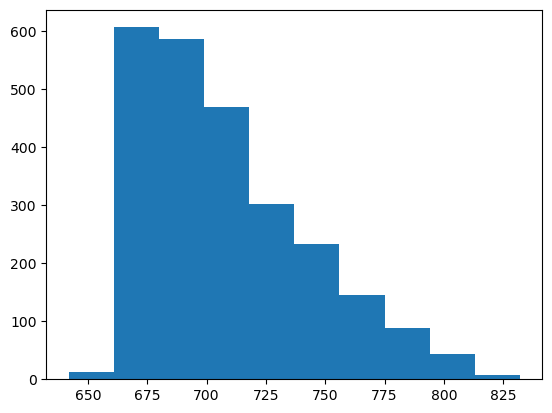

In [33]:
plt.hist(vanilla_df['fico_average'])

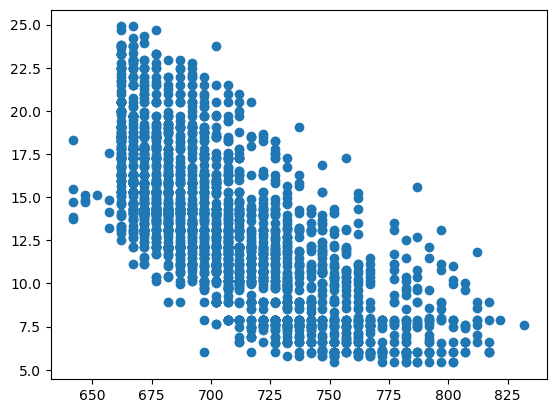

In [34]:
plt.scatter(vanilla_df['fico_average'], vanilla_df['interest_rate'])

Text(0.5, 1.0, 'Fico Score Compared to Interest Rate')

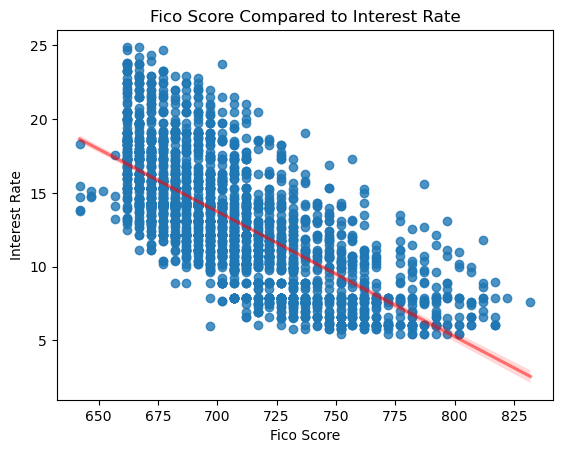

In [39]:
sns.regplot(x=vanilla_df['fico_average'], y=vanilla_df['interest_rate'], line_kws={'color':'red', 'alpha':0.5})
plt.xlabel('Fico Score')
plt.ylabel('Interest Rate')
plt.title('Fico Score Compared to Interest Rate')

In [15]:
y = vanilla_df['interest_rate']
X = vanilla_df.drop('interest_rate',axis=1)

In [16]:
X

,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,20000.0,20000.00,36.0,737.0
1,19200.0,19200.00,36.0,717.0
2,35000.0,35000.00,60.0,692.0
3,10000.0,9975.00,36.0,697.0
4,12000.0,12000.00,36.0,697.0
...,...,...,...,...
2493,30000.0,29950.00,60.0,707.0
2494,16000.0,16000.00,60.0,742.0
2495,10000.0,10000.00,36.0,682.0
2496,6000.0,6000.00,36.0,677.0


In [17]:
y

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2493    16.77
2494    14.09
2495    13.99
2496    12.42
2497    13.79
Name: interest_rate, Length: 2498, dtype: float64

In [18]:
interest_model = LinearRegression()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=10)

In [21]:
X_train= scaler.fit_transform(X_train,y_train)
X_test= scaler.fit_transform(X_test,y_test)
interest_model.fit(X_train,y_train)


LinearRegression()

In [22]:
train_predicted = interest_model.predict(X_train)
test_predicted = interest_model.predict(X_test)

In [23]:
np.sqrt(metrics.mean_squared_error(y_train, train_predicted))

2.1108717477762453

In [24]:
np.sqrt(metrics.mean_squared_error(y_test, test_predicted))

2.085504368900322

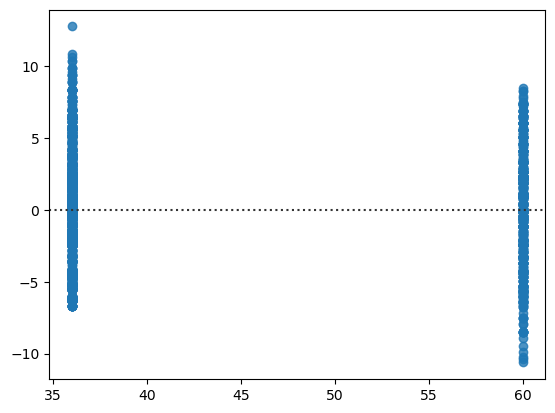

In [25]:
balance_resid = sns.residplot(y=y.values, x=X.iloc[:,2].values)

In [26]:
X

,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,20000.0,20000.00,36.0,737.0
1,19200.0,19200.00,36.0,717.0
2,35000.0,35000.00,60.0,692.0
3,10000.0,9975.00,36.0,697.0
4,12000.0,12000.00,36.0,697.0
...,...,...,...,...
2493,30000.0,29950.00,60.0,707.0
2494,16000.0,16000.00,60.0,742.0
2495,10000.0,10000.00,36.0,682.0
2496,6000.0,6000.00,36.0,677.0


In [27]:
interest_model.coef_

array([ 0.55161994,  0.50297955,  1.37052524, -3.06210478])

In [28]:
X_train

array([[-0.06048759, -0.00599373, -0.53103543, -0.0296898 ],
       [-0.95108282, -0.9059114 , -0.53103543, -0.0296898 ],
       [-0.95108282, -0.9059114 , -0.53103543,  0.54508011],
       ...,
       [-0.82385493, -0.77735173, -0.53103543, -0.60445971],
       [-0.67118146, -0.62308013, -0.53103543, -0.89184466],
       [-0.34038895, -0.30489496, -0.53103543,  1.55092746]])